In [96]:
from sklearn import datasets, metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

In [97]:
dic = {}
df = pd.read_csv('./west-nile-virus-wnv-mosquito-test-results.csv', encoding="utf-8")

In [98]:
#First, let's convert "RESULT" to integer
label = {'positive':1,'negative':0}
df['RESULT'] = df['RESULT'].map(label)
df['RESULT'] = df['RESULT'].astype('int')
df = df[df['RESULT'] == 1]   #Select only result containing positive vector
pos = df

In [99]:
# original data
print(df.shape)
print(df.dtypes)
# df.head()

(2338, 18)
SEASON YEAR                     int64
WEEK                            int64
TEST ID                         int64
BLOCK                          object
TRAP                           object
TRAP_TYPE                      object
TEST DATE                      object
NUMBER OF MOSQUITOES            int64
RESULT                          int32
SPECIES                        object
LATITUDE                      float64
LONGITUDE                     float64
LOCATION                       object
Wards                         float64
Census Tracts                 float64
Zip Codes                     float64
Community Areas               float64
Historical Wards 2003-2015    float64
dtype: object


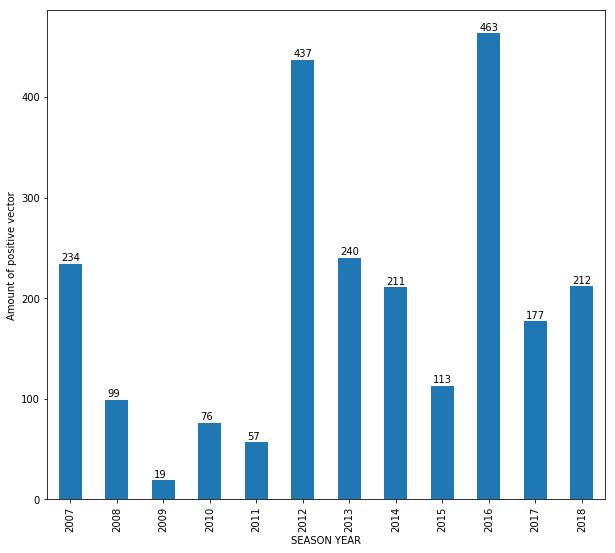

In [100]:
#Now visualize the amount of positive vectors
import matplotlib.pyplot as plt

plt.figure(figsize=(10,9))

#pos_mos sums positive vectors(1) by year
#It represents number of positive vectors found in each year
pos_mos = df.groupby(df['SEASON YEAR']).sum()['RESULT'].plot.bar()
pos_mos.set_ylabel('Amount of positive vector')

#Add text above each bar
#Took me little long to find this method!!!!
#pos_mos.patches is a way to use property in site the object
for i in pos_mos.patches:
    x_value = i.get_x()
    y_value = i.get_height()
    plt.annotate(str(y_value),xy=(x_value+0.05,y_value+3))
    
#Now we figure out where should we focus on
#Ranked from highest amount year 2016,2012,2013,and 2007 show highest positive vectors
#Based on above, let's see what species were found the highest to be positive

In [101]:
# Preprocessing
df = df.drop(columns = ['LOCATION', 'TEST ID', 'TRAP', 'SEASON YEAR', 'WEEK', 'RESULT'])  #, 'TEST DATE'
df = df.dropna() # 去除有空值的row
df['TEST DATE'] = df['TEST DATE'].str.split('T').str[0].str.replace('-', '') # 去掉時間轉為純日期字串
df['TEST DATE'] = df['TEST DATE'].astype('int64') # 字串轉為 int
nonNumCol = ['BLOCK', 'TRAP_TYPE', 'SPECIES', 'Zip Codes'] # 非數字欄位  , 'RESULT'

for col in nonNumCol: # 將欄位轉為數值資料
    df[col] = df[col].astype('category')
    dic[col] = dict(enumerate(df[col].cat.categories)) # 類別對照dict
    df[col] = df[col].cat.codes

In [102]:
# transformed data
print(df.shape)
print(df.dtypes)
df.head()

(1748, 12)
BLOCK                            int8
TRAP_TYPE                        int8
TEST DATE                       int64
NUMBER OF MOSQUITOES            int64
SPECIES                          int8
LATITUDE                      float64
LONGITUDE                     float64
Wards                         float64
Census Tracts                 float64
Zip Codes                        int8
Community Areas               float64
Historical Wards 2003-2015    float64
dtype: object


,BLOCK,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,SPECIES,LATITUDE,LONGITUDE,Wards,Census Tracts,Zip Codes,Community Areas,Historical Wards 2003-2015
77,39,2,20180920,50,1,41.891455,-87.689763,46.0,545.0,9,25.0,41.0
109,39,2,20180920,19,2,41.891455,-87.689763,46.0,545.0,9,25.0,41.0
125,39,1,20180920,5,1,41.892220,-87.691698,46.0,177.0,9,24.0,41.0
127,39,2,20180920,50,1,41.891455,-87.689763,46.0,545.0,9,25.0,41.0
145,39,2,20180913,42,1,41.891455,-87.689763,46.0,545.0,9,25.0,41.0


In [103]:
X = df.to_numpy() # convert to numpy array
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(1748, 12)


## K-means 分群

In [104]:
silhouette_avgs = []
range_to = 31
for i in range(3, range_to):
    estimator = KMeans(n_clusters = i)  # 構造聚類器
    estimator.fit(X)  # 聚類
    label_pred = estimator.labels_  # 獲取聚類標籤
    
    silhouette_avg = metrics.silhouette_score(X, label_pred)
    silhouette_avgs.append(silhouette_avg)

    label, count = np.unique(label_pred, return_counts=True)
    label_dict = dict(zip(label, count))
    print("Clusters: ", i)
    print("Silhouette Value: ", silhouette_avg)
#     print(label_dict)
    print("===================================================")


Clusters:  3
Silhouette Value:  0.7165516972800637
Clusters:  4
Silhouette Value:  0.6974280705915127
Clusters:  5
Silhouette Value:  0.7468028818364683
Clusters:  6
Silhouette Value:  0.7607831653185867
Clusters:  7
Silhouette Value:  0.8093476760408905
Clusters:  8
Silhouette Value:  0.8335360603568985
Clusters:  9
Silhouette Value:  0.8842370493831484
Clusters:  10
Silhouette Value:  0.9421418622924113
Clusters:  11
Silhouette Value:  0.9563634576658386
Clusters:  12
Silhouette Value:  0.9692350817301002
Clusters:  13
Silhouette Value:  0.8977171666400254
Clusters:  14
Silhouette Value:  0.8331793411061964
Clusters:  15
Silhouette Value:  0.7893547367831102
Clusters:  16
Silhouette Value:  0.7440032166649977
Clusters:  17
Silhouette Value:  0.7029855762679701
Clusters:  18
Silhouette Value:  0.6680498770543333
Clusters:  19
Silhouette Value:  0.6535221821568528
Clusters:  20
Silhouette Value:  0.6367982244608064
Clusters:  21
Silhouette Value:  0.6207942854727909
Clusters:  22
Silho

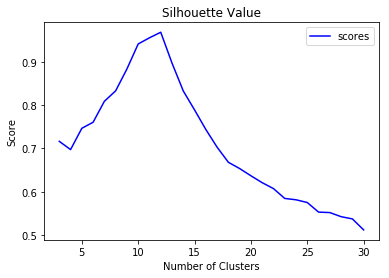

In [105]:
# 作圖並印出 k = 3 到 20 的績效
# plt.bar(ks, silhouette_avgs)
# plt.show()
# print(silhouette_avgs)

plt.title('Silhouette Value')
plt.plot(range(3, range_to), silhouette_avgs, color='blue', label='scores')
plt.legend()
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [106]:
print(silhouette_avgs)
max_sil = max(silhouette_avgs)
idx = silhouette_avgs.index(max_sil)+3  # index+3 = number of clusters
print(idx, max_sil)

[0.7165516972800637, 0.6974280705915127, 0.7468028818364683, 0.7607831653185867, 0.8093476760408905, 0.8335360603568985, 0.8842370493831484, 0.9421418622924113, 0.9563634576658386, 0.9692350817301002, 0.8977171666400254, 0.8331793411061964, 0.7893547367831102, 0.7440032166649977, 0.7029855762679701, 0.6680498770543333, 0.6535221821568528, 0.6367982244608064, 0.6207942854727909, 0.607105298890495, 0.584341097198531, 0.581215735369141, 0.5748527305304737, 0.5526822255251567, 0.5515861673824705, 0.5420796106941351, 0.5369189450699197, 0.5114285135846467]
12 0.9692350817301002


In [107]:
# 重新k-means最佳的那一次
estimator = KMeans(n_clusters = idx, )  
estimator.fit(X)  
    
print(estimator)
print(estimator.labels_)
print (pd.Series(estimator.labels_).value_counts())

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[4 4 4 ... 2 2 2]
0     352
1     328
2     212
3     196
5     192
4     138
8      89
7      78
9      71
6      47
10     30
11     15
dtype: int64


In [108]:
cols = list(df.columns.values)
print(len(cols))
print(cols)
col_pairs = []
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        col_pairs.append([cols[i], cols[j]])
print(len(col_pairs))
# print(col_pairs)

12
['BLOCK', 'TRAP_TYPE', 'TEST DATE', 'NUMBER OF MOSQUITOES', 'SPECIES', 'LATITUDE', 'LONGITUDE', 'Wards', 'Census Tracts', 'Zip Codes', 'Community Areas', 'Historical Wards 2003-2015']
66


In [109]:
print(estimator.cluster_centers_)
centers = np.array(estimator.cluster_centers_)

[[ 6.03238636e+01  1.00568182e+00  2.01608161e+07  3.10369318e+01
   1.40340909e+00  4.18778808e+01 -8.77199646e+01  2.68068182e+01
   4.43454545e+02  2.21846591e+01  3.94204545e+01  2.98125000e+01]
 [ 6.60701220e+01  1.00000000e+00  2.01207570e+07  3.12012195e+01
   1.17682927e+00  4.18848494e+01 -8.77261087e+01  2.65792683e+01
   4.85588415e+02  2.38963415e+01  3.57621951e+01  3.24664634e+01]
 [ 4.53962264e+01  6.69811321e-01  2.00708264e+07  2.76415094e+01
   3.96226415e-01  4.17961490e+01 -8.76764108e+01  3.26179245e+01
   3.72471698e+02  2.24433962e+01  4.54669811e+01  3.47075472e+01]
 [ 5.76530612e+01  1.00000000e+00  2.01408358e+07  2.64081633e+01
   9.03061224e-01  4.18760512e+01 -8.77166676e+01  2.81071429e+01
   4.28030612e+02  2.15153061e+01  3.78010204e+01  2.97295918e+01]
 [ 5.96231884e+01  1.13043478e+00  2.01807866e+07  1.76304348e+01
   1.61594203e+00  4.18381641e+01 -8.77048483e+01  2.82608696e+01
   3.69913043e+02  2.04492754e+01  4.47101449e+01  2.96666667e+01]
 [ 5.

(1748, 12) 12 12 1748
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.8666666

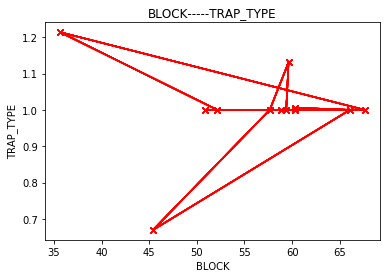

r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   

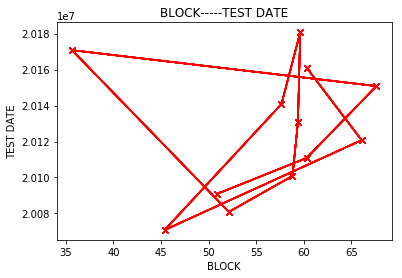

r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292

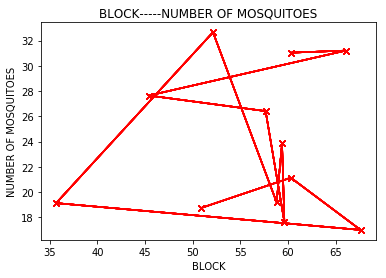

r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666

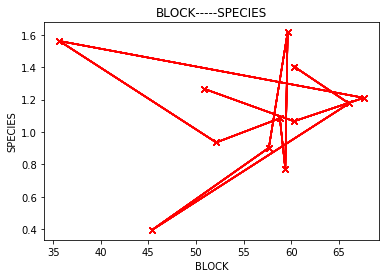

r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292

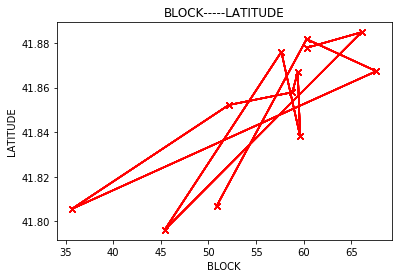

r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.380

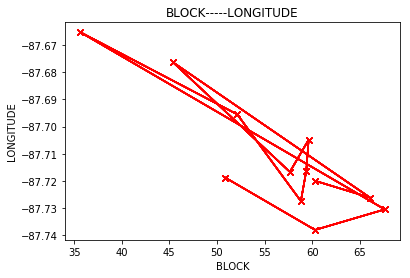

r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292

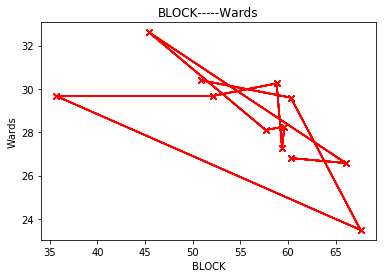

r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.380

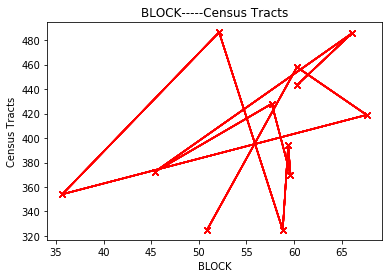

r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292

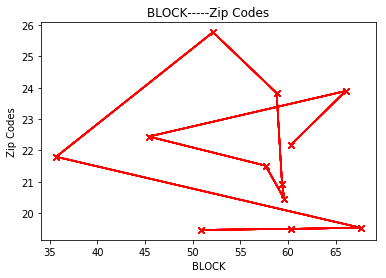

r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292

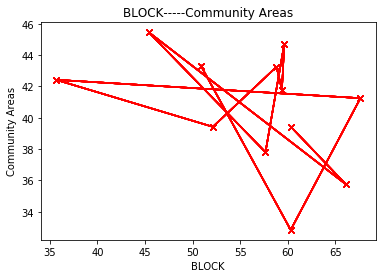

r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292135 67.61971831 60.3        50.86666667] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
r.
[60.32386364 66.07012195 45.39622642 57.65306122 59.62318841 59.38020833
 58.80851064 52.12820513 35.66292

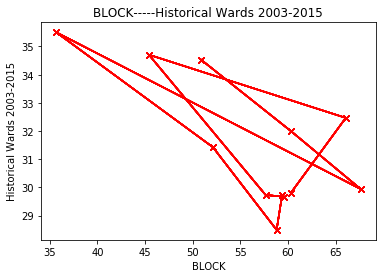

g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150

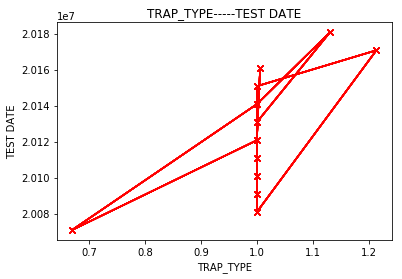

g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [31.03693182 31.20121951 27.64150943 26

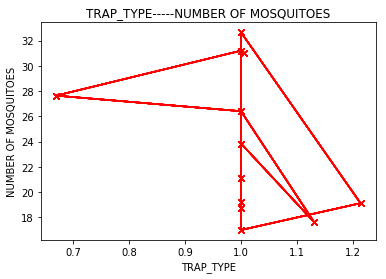

g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510

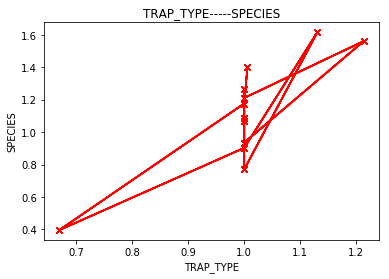

g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [41.87788079 41.88484944 41.79614896 41

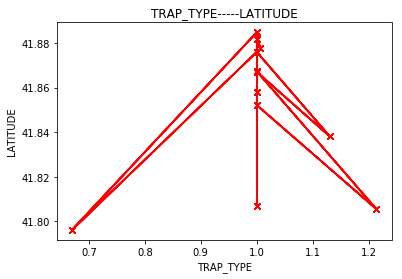

g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] 

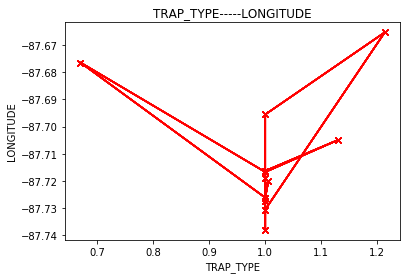

g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [26.80681818 26.57926829 32.61792453 28

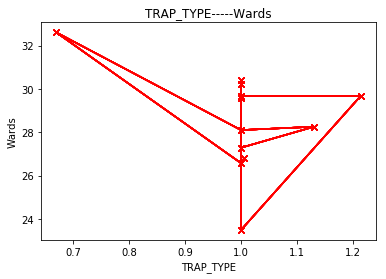

g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] 

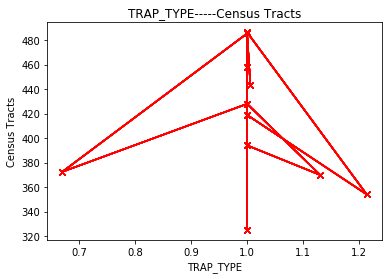

g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [22.18465909 23.89634146 22.44339623 21

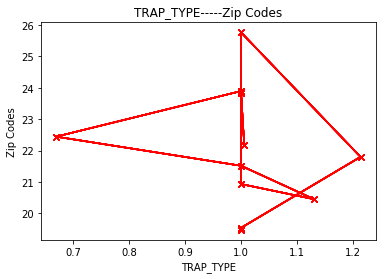

g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [39.42045455 35.76219512 45.46698113 37

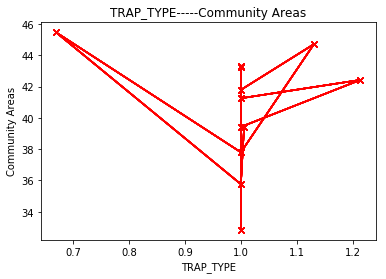

g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
g.
[1.00568182 1.         0.66981132 1.         1.13043478 1.
 1.         1.         1.21348315 1.         1.         1.        ] [29.8125     32.46646341 34.70754717 29

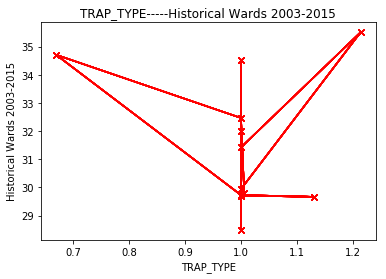

b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333]
b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333]
b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [31.03693182 31.20121951 27.64150943 

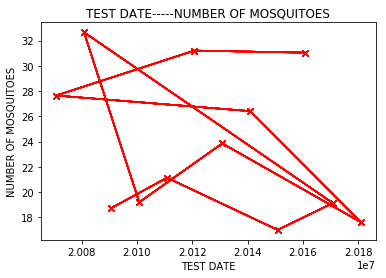

b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667]
b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667]
b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.770

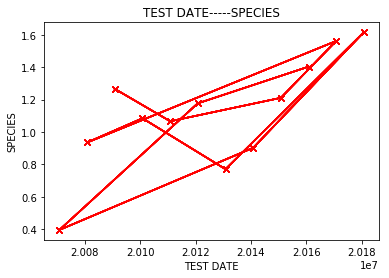

b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938]
b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938]
b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [41.87788079 41.88484944 41.79614896 

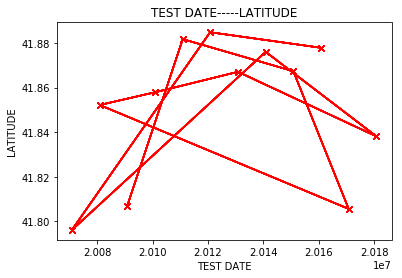

b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891]
b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891]
b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [-87.719964

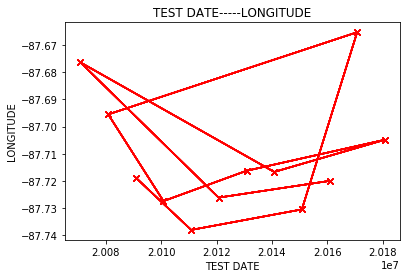

b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ]
b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ]
b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [26.80681818 26.57926829 32.61792453 

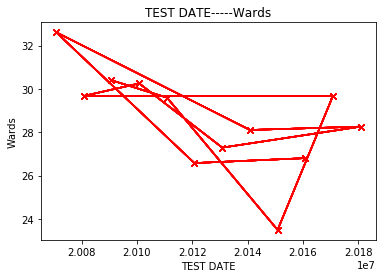

b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [443.454545

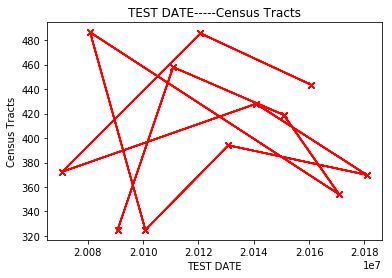

b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [22.18465909 23.89634146 22.44339623 

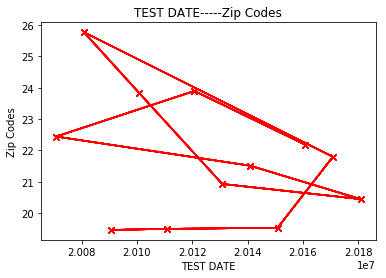

b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [39.42045455 35.76219512 45.46698113 

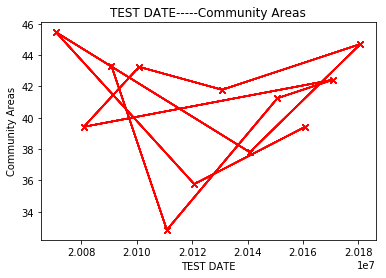

b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
b.
[20160816.07102273 20120756.9847561  20070826.41509434 20140835.76020408
 20180786.60144927 20130831.171875   20100835.12765957 20080866.26923077
 20170802.96629214 20150826.76056338 20110856.3        20090815.06666667] [29.8125     32.46646341 34.70754717 

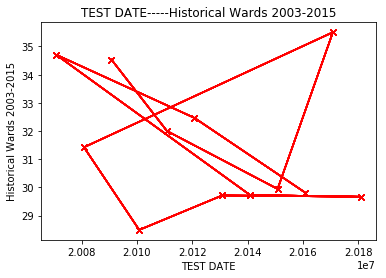

c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333

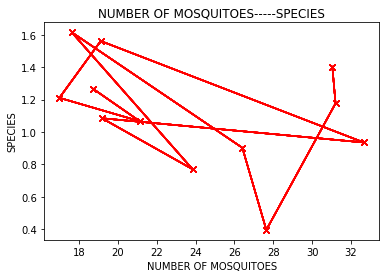

c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359

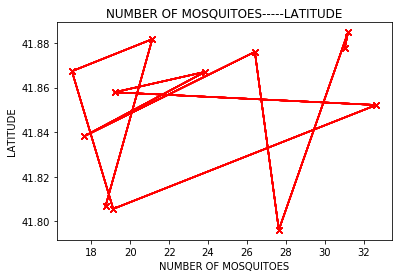

c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.848

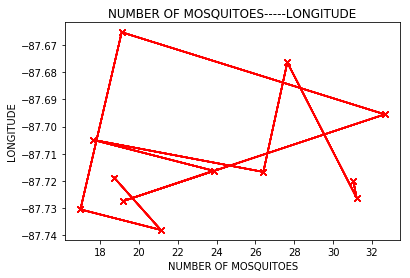

c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359

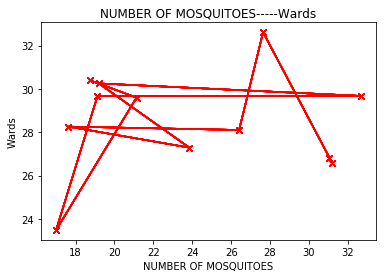

c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.848

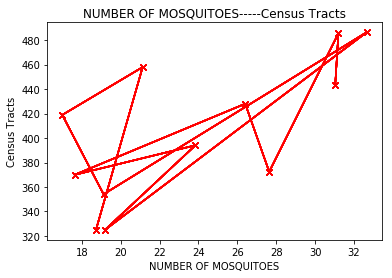

c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359

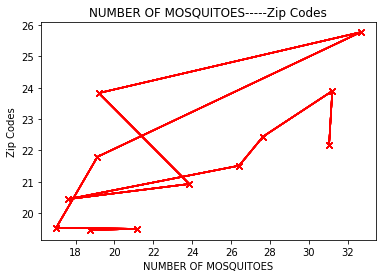

c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359

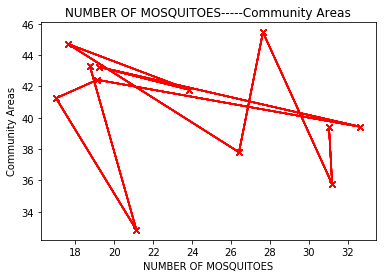

c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359551 17.         21.13333333 18.73333333] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
c.
[31.03693182 31.20121951 27.64150943 26.40816327 17.63043478 23.84895833
 19.19148936 32.65384615 19.12359

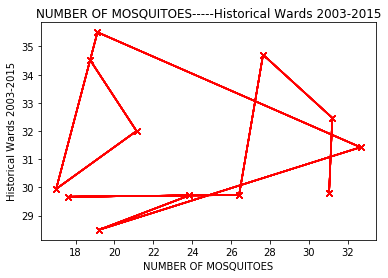

m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [41.877

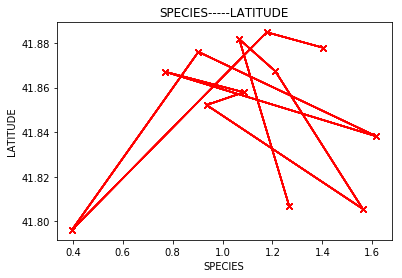

m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.

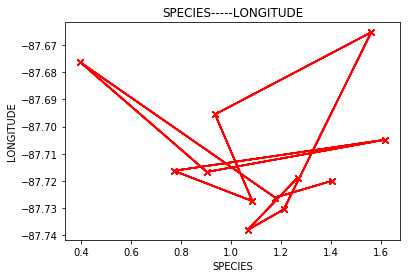

m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [26.806

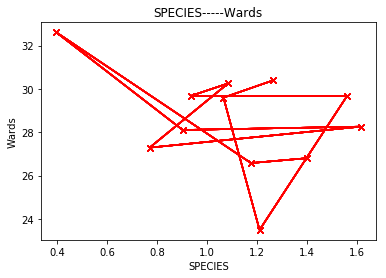

m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.

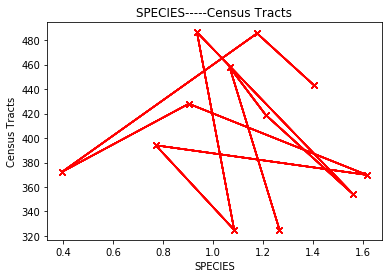

m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [22.184

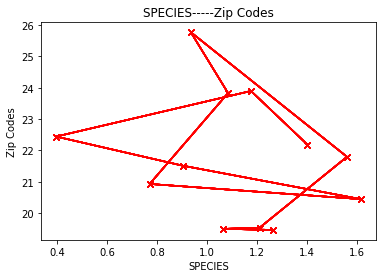

m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [39.420

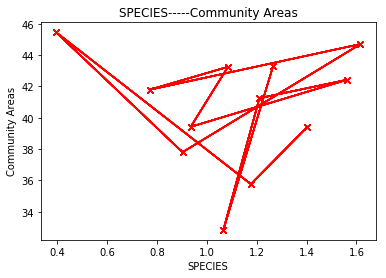

m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
m.
[1.40340909 1.17682927 0.39622642 0.90306122 1.61594203 0.77083333
 1.08510638 0.93589744 1.56179775 1.21126761 1.06666667 1.26666667] [29.812

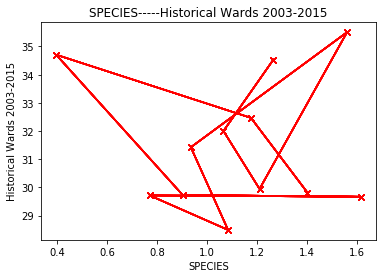

y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938] [-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891]
y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938] [-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891]
y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938] [-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891]
y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.867

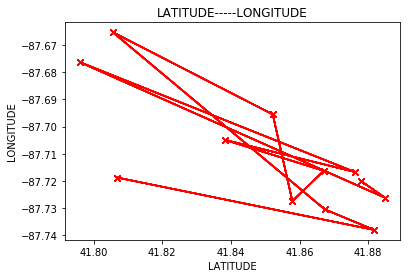

y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938] [26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ]
y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938] [26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ]
y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938] [26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ]
y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558

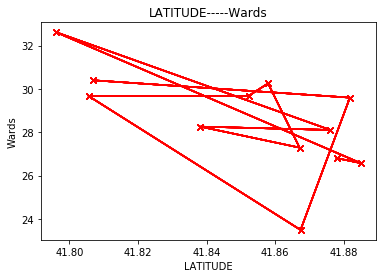

y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.867

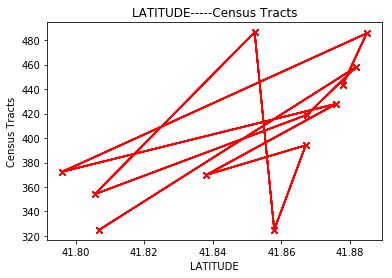

y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558

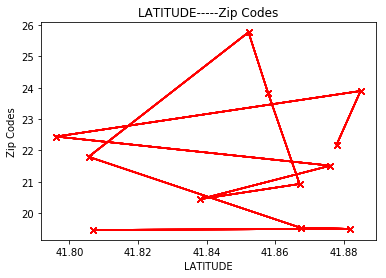

y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558

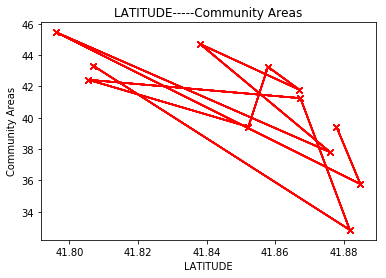

y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558711 41.86737028 41.88175505 41.80693938] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
y.
[41.87788079 41.88484944 41.79614896 41.87605121 41.8381641  41.86708584
 41.8579115  41.85220136 41.80558

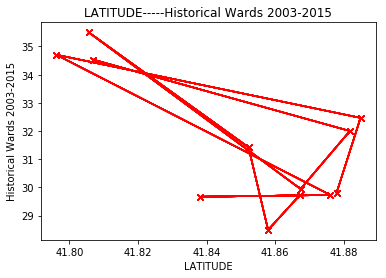

k.
[-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891] [26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ]
k.
[-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891] [26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ]
k.
[-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891] [26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ]
k.
[-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 

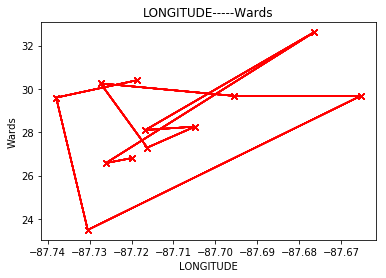

k.
[-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
k.
[-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
k.
[-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
k.
[-87.71996458 -87.72610868 -

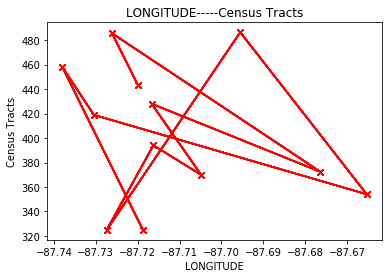

k.
[-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
k.
[-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
k.
[-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
k.
[-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 

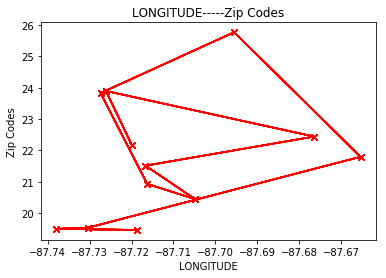

k.
[-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
k.
[-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
k.
[-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
k.
[-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 

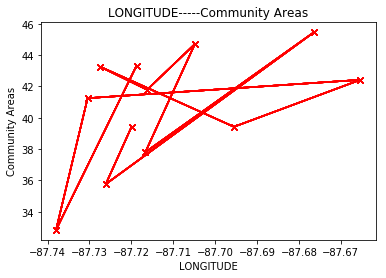

k.
[-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
k.
[-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
k.
[-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 -87.71624771 -87.72738428 -87.69551129 -87.66532171 -87.73044876
 -87.73798562 -87.71875891] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
k.
[-87.71996458 -87.72610868 -87.67641079 -87.71666762 -87.70484835
 

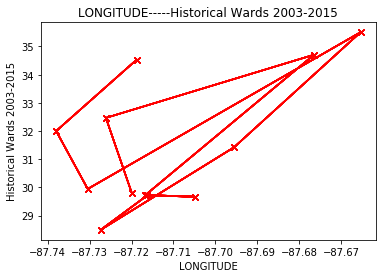

r*
[26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
r*
[26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
r*
[26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ] [443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ]
r*
[26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.291

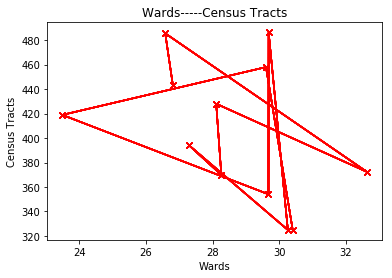

r*
[26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
r*
[26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
r*
[26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
r*
[26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.67415

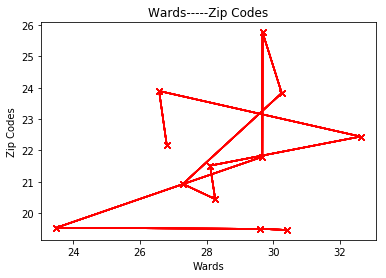

r*
[26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
r*
[26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
r*
[26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
r*
[26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.67415

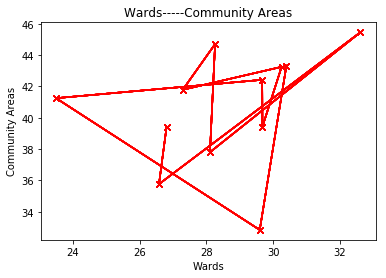

r*
[26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
r*
[26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
r*
[26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.6741573  23.49295775 29.6        30.4       ] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
r*
[26.80681818 26.57926829 32.61792453 28.10714286 28.26086957 27.29166667
 30.25531915 29.67948718 29.67415

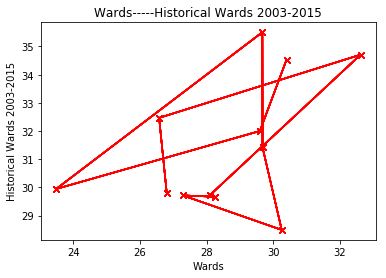

g*
[443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
g*
[443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
g*
[443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ] [22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667]
g*
[443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 

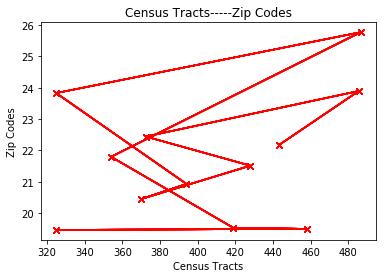

g*
[443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
g*
[443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
g*
[443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
g*
[443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 

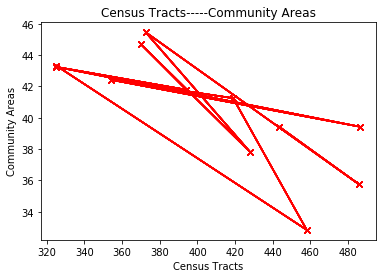

g*
[443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
g*
[443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
g*
[443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 394.078125   324.89361702 486.5        354.05617978 418.91549296
 458.         325.        ] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
g*
[443.45454545 485.58841463 372.47169811 428.03061224 369.91304348
 

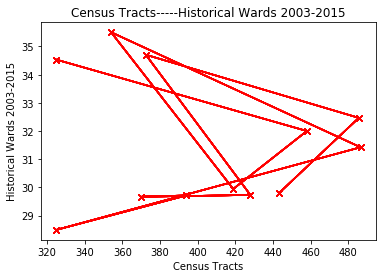

b*
[22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
b*
[22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
b*
[22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667] [39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333]
b*
[22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775

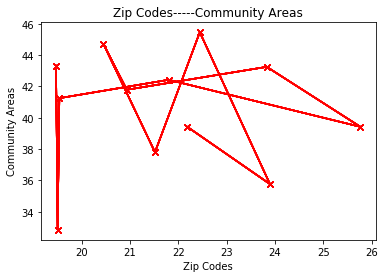

b*
[22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
b*
[22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
b*
[22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775281 19.53521127 19.5        19.46666667] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
b*
[22.18465909 23.89634146 22.44339623 21.51530612 20.44927536 20.93229167
 23.82978723 25.76923077 21.79775

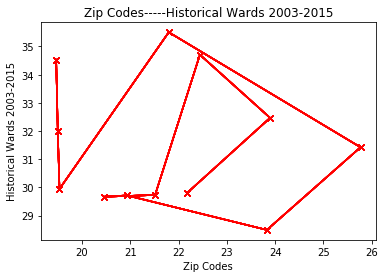

c*
[39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
c*
[39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
c*
[39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696629 41.25352113 32.83333333 43.33333333] [29.8125     32.46646341 34.70754717 29.72959184 29.66666667 29.71354167
 28.4893617  31.42307692 35.50561798 29.94366197 32.         34.53333333]
c*
[39.42045455 35.76219512 45.46698113 37.80102041 44.71014493 41.79166667
 43.25531915 39.42307692 42.42696

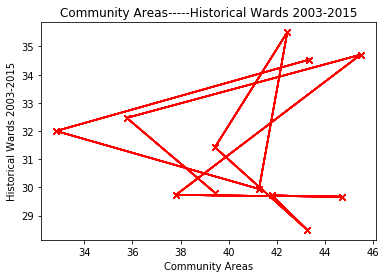

In [110]:
colors = ['r.', 'g.', 'b.', 'c.', 'm.', 'y.', 'k.', 'r*', 'g*', 'b*', 'c*', 'm*', 'y*', 'k*']
print(X.shape, len(cols), idx, len(estimator.labels_))

for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        plt.figure()
        for c in range(idx):
#             plt.plot(X[estimator.labels_ == c][:, i], X[estimator.labels_ == c][:, j], colors[c])
            print(colors[i])
            print(centers[:,i], centers[:,j])
            plt.plot(centers[:,i], centers[:,j], marker="x", color = 'r')
        
        plt.xlabel(cols[i])
        plt.ylabel(cols[j])
        plt.title(cols[i]+'-----'+cols[j])
        plt.show()